In [23]:
import numpy as np

x = np.loadtxt("weights_tract.txt")

In [24]:
x = np.loadtxt("lengths_tract.txt")

In [25]:
x.shape

(66, 66)

In [26]:
thirty_rest = np.loadtxt("30rest.txt", float, delimiter = ",")

In [27]:
thirty_rest

array([[-0.019213 ,  0.39832  ,  0.76035  , ...,  0.32154  ,  0.14884  ,
        -0.01239  ],
       [ 0.024214 , -0.23516  , -0.47614  , ..., -0.69366  , -0.36313  ,
         0.028063 ],
       [-0.051412 , -0.02052  , -0.0022461, ...,  0.27     ,  0.13797  ,
        -0.012105 ],
       ...,
       [ 0.0029772,  0.11148  ,  0.23889  , ...,  0.40649  ,  0.23497  ,
         0.0088606],
       [ 0.025675 ,  0.046782 ,  0.090447 , ..., -0.52382  , -0.27363  ,
         0.020387 ],
       [ 0.0068168, -0.16816  , -0.29401  , ..., -0.44056  , -0.23925  ,
        -0.0040264]])

In [28]:
thirty_rest.shape

(66, 36000)

In [29]:
np.reshape(thirty_rest, (66,30, 1200))

array([[[-1.9213e-02,  3.9832e-01,  7.6035e-01, ...,  4.8259e-01,
          3.0986e-01, -4.7860e-03],
        [ 9.8779e-03,  1.0824e-01,  2.4544e-01, ..., -1.4156e+00,
         -8.3614e-01,  1.6154e-02],
        [-1.7863e-02, -1.1200e-01, -1.8124e-01, ..., -3.4356e-01,
         -2.4087e-01, -2.4911e-03],
        ...,
        [ 1.9815e-02,  9.2445e-01,  1.5818e+00, ...,  6.3453e-01,
          3.6640e-01, -6.5726e-02],
        [ 4.8342e-03,  5.5779e-01,  9.9386e-01, ..., -5.4277e-01,
         -2.9789e-01, -2.3456e-02],
        [-1.3711e-02,  8.9147e-02,  2.0765e-01, ...,  3.2154e-01,
          1.4884e-01, -1.2390e-02]],

       [[ 2.4214e-02, -2.3516e-01, -4.7614e-01, ...,  9.8765e-01,
          5.8650e-01,  3.3178e-02],
        [-4.8668e-03,  3.9001e-01,  6.8447e-01, ..., -5.0064e-01,
         -2.5961e-01, -3.7826e-03],
        [ 2.0298e-02, -2.9040e-01, -5.1543e-01, ...,  1.8496e-01,
          1.3880e-01,  8.2450e-03],
        ...,
        [-2.8212e-02, -8.4754e-01, -1.5550e+00, ...,  

In [30]:
img = np.corrcoef(thirty_rest)

In [31]:
import matplotlib.pyplot as plt


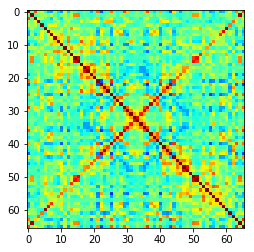

In [32]:
plt.imshow(img, cmap = "jet")
plt.clim(-1,1)
plt.show()

In [33]:
weight_matrix = np.loadtxt("weights_tract.txt")

In [34]:
all_eigenvalues = np.linalg.eig(weight_matrix)

In [35]:
eigenvalues = all_eigenvalues[0] #non-unit eigenvectors
sorted_eigenvalues = sorted(eigenvalues, reverse = True)
sorted_eigenvalues

[87.03524699975003,
 79.51911643721276,
 68.3464330897028,
 51.71014006637747,
 40.746161791150314,
 35.69132811376007,
 32.42533696587602,
 30.31631572696904,
 23.210872266729915,
 21.438006081710093,
 19.142386749256694,
 16.153462759759886,
 14.454175801422863,
 12.915331049488165,
 12.73976606699159,
 12.415970357758024,
 10.844788111889606,
 9.056649448730436,
 6.8462711937198115,
 6.01240356136137,
 4.881117138840596,
 4.758719416513648,
 4.269016964330492,
 3.2849614230767648,
 2.9439262585635846,
 0.4010396245592446,
 0.1807626661535677,
 -0.4189126785543632,
 -0.780134475240446,
 -1.4121795131549015,
 -1.5675516659950592,
 -2.863977520965398,
 -3.537623016361088,
 -5.349331341214558,
 -5.4641328730872605,
 -5.869575229154473,
 -6.641373442709361,
 -7.007257143061037,
 -7.428542249356081,
 -7.823305995111843,
 -8.73672710631035,
 -9.055647626924584,
 -9.402600894001766,
 -9.530507581599696,
 -10.044288502028197,
 -10.319830144285863,
 -11.662816632254065,
 -12.351980132943838,


In [36]:
#max_eigenvalue = np.amax(eigenvalues)
eigen_to_divide_by = sorted_eigenvalues[0]

In [37]:
new_weight_matrix = weight_matrix / eigen_to_divide_by
new_weight_matrix = new_weight_matrix * .9 

In [38]:
identity_matrix = np.identity(66)

In [39]:
weight_minus_id = np.subtract(new_weight_matrix, identity_matrix)

In [40]:
dt = .72

#all_rs = [random_vector]
#random_vector = np.zeros(66)

In [41]:
# all_rs.append(random_vector)   dont know whether or not to include the inital random vector

In [42]:
from statistics import mean
def formulate(mag: int):
    random_vector = np.random.randn(66)
    all_rs = [random_vector]
    norms = []
    for i in range(1199):
        noise = np.random.randn(66) * mag
        norms.append(np.linalg.norm(noise))
        product = np.matmul(weight_minus_id, random_vector)
        dr_dt = np.add(product, noise)
        dr = dr_dt * dt
        random_vector = np.add(random_vector, dr)
        #all_rs.append(random_vector)
        #all_rs = [random_vector] + all_rs
        all_rs.append(random_vector)
    
    rs_over_time = np.asarray(all_rs)
    rs_over_time_transpose = np.transpose(rs_over_time)
    print(mean(norms))
    return rs_over_time_transpose


In [43]:
thirty_rest = np.reshape(thirty_rest, (30,66,1200))

8.09671151952377
36.0088365002329
16.99984377790688


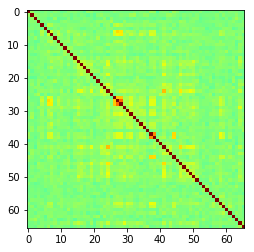

16.141740744248832
36.24141130809544
16.882499293138128


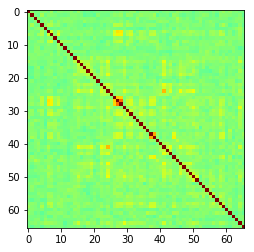

24.39542423011951
35.84993486502608
16.786639389179427


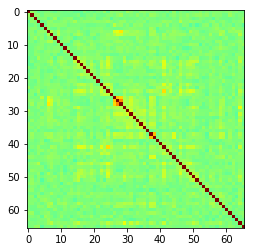

32.48908575463547
36.07126379085718
16.99951391394108


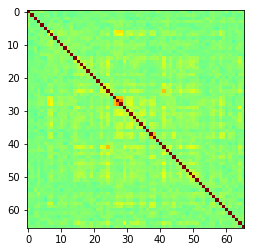

40.679715850527046
36.332581006976845
16.836353810988335


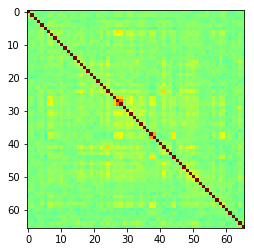

48.81288663370869
36.58214491055078
17.12132084758917


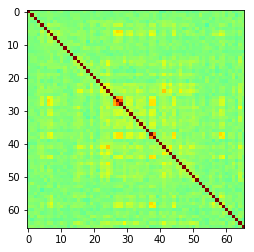

56.44256142015529
36.17358791421663
16.99709189284435


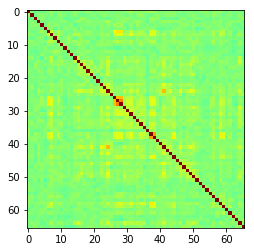

64.9852177498659
36.28184350270577
16.894151749347984


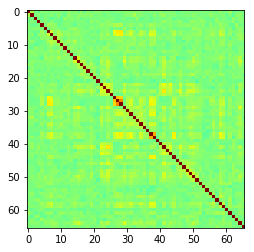

72.73672474903871
36.27751484522089
16.93214483158163


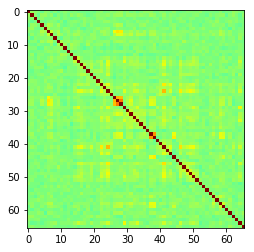

80.92965456258429
36.22939435750011
17.09248708531644


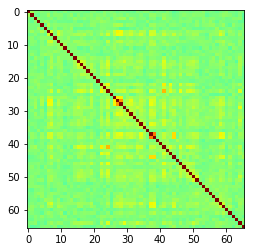

88.9025792462296
36.17333934827002
17.103296202651844


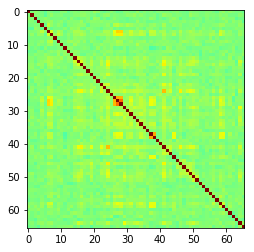

97.10047617238908
36.1679417521813
16.81465954173405


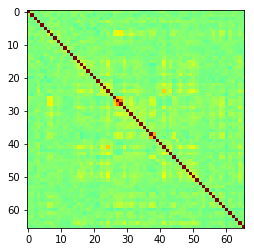

104.73152529221538
37.05543986010071
17.129672189045987


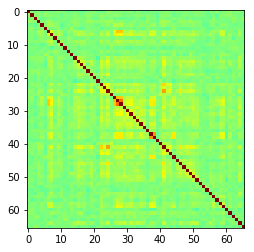

112.93093139432257
35.92653118532201
16.93249609691921


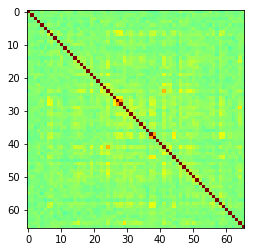

122.12970789398177
36.183294924052774
16.833574005121395


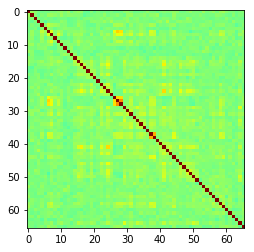

129.02791660875127
36.81593160526605
17.076481968330768


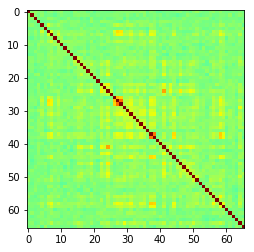

136.85721648485685
36.55293990687072
16.915969678511118


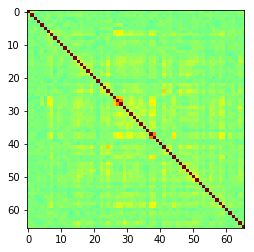

145.68913238938165
36.19010761512082
16.687487797150155


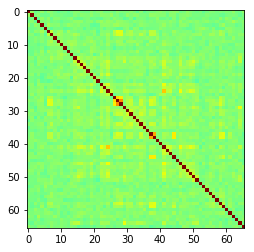

153.66531329439826
36.161073429618106
16.911133637284994


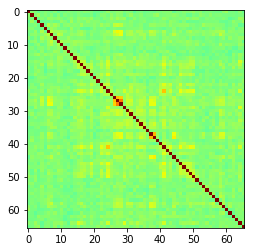

162.35447914124612
35.99772897876741
17.0747841417458


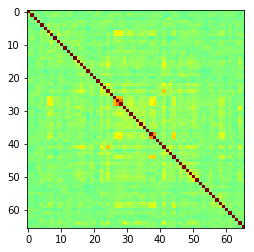

In [44]:
all_data = []
for i in range(20):
    result_at_1200 = formulate((i+1))
    result_img = np.corrcoef(result_at_1200)
    
    norm_list = []
    distance_from_data_coef = np.linalg.norm(np.subtract(img, result_img))
    coef = np.corrcoef(img, result_img)
    coef_norm = np.linalg.norm(coef)
   
    print(coef_norm)
    print(distance_from_data_coef)
    #(distance from, the coeficient matrix, the the factor the noise vector is multiplied by)
    all_data.append((distance_from_data_coef, coef))
    
    plt.imshow(result_img, cmap = "jet")
    plt.clim(-1,1)
    plt.show()
    
    

16.687487797150155


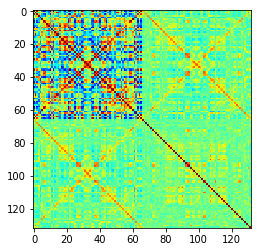

In [45]:
closest = sorted(all_data)[0]
print(closest[0])
plt.imshow(closest[1], cmap = "jet")
plt.clim(-1,1)
plt.show()

